# Here I will start a small scale analysis (of 6 months of 2007)
This is bringing in some of the data organizing that I started with as well as some of the analysis that was experimented with in prior notebooks.

In [67]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [1]:
# import libraries
import xml.etree.ElementTree as Et
import glob
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import pickle
from pprint import pprint
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
pd2007 = pickle.load(open("nyt-2007.p", "rb"))
pd2007.head()

,DOCID,Date,Month,Year,Name,Text
0,1815718,1,1,2007,"BLUMENTHAL, MARTIN",blumenthal--martin. a new york business man an...
0,1815719,1,1,2007,"BRADLEY, CAROL L.","bradley--carol l., 84, of tinton falls, nj die..."
0,1815720,1,1,2007,"CRAWFORD, PERRY JR.","crawford--perry jr., died at 89 on december 13..."
0,1815721,1,1,2007,"FLOOD, ROBERT FRANCIS","flood--robert francis, husband of the late cat..."
0,1815722,1,1,2007,"GEISLER, ENID (FRIEDMAN)","geisler--enid (friedman), on december 29, 2006..."


In [3]:
pd2007 = pd2007.reset_index()
pd2007 = pd2007.sort_values('Name', ascending=True)
pd2007.head()

,index,DOCID,Date,Month,Year,Name,Text
43484,0,1844820,4,5,2007,".ROWN, SHERROD (SEN)",three democratic senators yesterday proposed u...
20865,0,1826921,18,2,2007,50 CENT,"late in the afternoon of jan. 16, a swat team ..."
33935,0,1837135,1,4,2007,"AALTO, ALVAR",to promote britain's first major retrospective...
33933,0,1837135,1,4,2007,"AALTO, ALVAR (1898-1976)",to promote britain's first major retrospective...
23452,0,1829159,27,2,2007,"AARON, DORA","aaron--dora, died february 25. wife of the lat..."


In [4]:
names = list(set(pd2007["Name"]))
names

['LEWIS, REV. MARK ALAN',
 'FREUD, SIGMUND (1856-1939)',
 'GLASSCOCK, LARRY C',
 'POLLEY, THOMAS HOOVER',
 'THORNHILL, KARL D',
 'FLOWERS, KOVON',
 'THOMAS, THURMAN',
 'MITCHELL, GEORGE D.',
 'ROSOFSKY, IRA',
 'BANGA, CAMERON',
 'SCHRADER, BILL',
 'BENJAMIN, DAVID',
 'AHMAD, KABEER',
 'DORTCH, VINCENT J',
 'GORDON, MONTE J.',
 'CHAUDHRY, HUMAYUN J',
 'STEINBERG, ALAN J',
 'PATTON, PHIL',
 'JOSEPH, BEATRICE',
 'HOLL, JOHN',
 "MIRZA, MUZZAFAR ''MUZZI''",
 'ANDERSEN, TOM',
 'SWINFORD, DAVID (REP)',
 'MYERS, JACK E',
 'GANS, JORDAN A.',
 'FALCO, EDIE',
 'DJ DRAMA (TYREE SIMMONS)',
 'STEWART, BILL',
 'RICHBERG, NICHOLAS',
 'CRUTCHFIELD, WILL',
 'SMITH, DAN (NATIONAL FIELD SELLING ASSN)',
 'WEESE, MIRANDA',
 'WOOLDRIDGE, ELLEN',
 'HAU, LENE VESTERGAARD (DR)',
 'TILLMAN, EMMA FAUST',
 'MOUSSAOUI, ZACARIAS',
 'MORSE, DAVID',
 'BLANKENBAKER, BETSY',
 'GOODWIN, ROD',
 'HUTCHISON, BRIAN',
 'DE OLIVEIRA, JOSE',
 'STAHL, JADELYNN',
 'GUYOT, JULIE VICTORIA',
 'HAIG, ALEXANDER',
 'LUKACS, JOHN',
 'PL

# START WORK ON ANALYSIS FOR SPECIFIC PEOPLE AND GENERATE VISUALIZATION
## Barack Obama

In [258]:
name = "OBAMA, BARACK"
subdf1 = pd2007.loc[pd2007["Name"] == name]
if len(subdf1) > 0:
    print(subdf1, len(subdf1))

       index    DOCID Date Month  Year           Name  \
39865      0  1841832   21     4  2007  OBAMA, BARACK   
12260      0  1822119   28     1  2007  OBAMA, BARACK   
38351      0  1840592   15     4  2007  OBAMA, BARACK   
16022      0  1824139    6     2  2007  OBAMA, BARACK   
13507      0  1822756   31     1  2007  OBAMA, BARACK   
26448      0  1831404    8     3  2007  OBAMA, BARACK   
50329      0  1850421   27     5  2007  OBAMA, BARACK   
10611      0  1821182   24     1  2007  OBAMA, BARACK   
9695       0  1820735   22     1  2007  OBAMA, BARACK   
18503      0  1825539   11     2  2007  OBAMA, BARACK   
22340      0  1828161   23     2  2007  OBAMA, BARACK   
31716      0  1835355   25     3  2007  OBAMA, BARACK   
36509      0  1839179    9     4  2007  OBAMA, BARACK   
7499       0  1819626   18     1  2007  OBAMA, BARACK   
23386      0  1829083   26     2  2007  OBAMA, BARACK   
23392      0  1829084   26     2  2007  OBAMA, BARACK   
14715      0  1823382    3     

In [259]:
subdf1.drop_duplicates(subset='DOCID').head()

,index,DOCID,Date,Month,Year,Name,Text
39865,0,1841832,21,4,2007,"OBAMA, BARACK",grappling with one of the biggest domestic pol...
12260,0,1822119,28,1,2007,"OBAMA, BARACK",hillary clinton has an answer to those who sus...
38351,0,1840592,15,4,2007,"OBAMA, BARACK",it was never too hard to figure out a big part...
16022,0,1824139,6,2,2007,"OBAMA, BARACK",as hollywood closes in on oscar night with its...
13507,0,1822756,31,1,2007,"OBAMA, BARACK",some of the nation's most enduring memories of...


In [260]:
subdf1 = subdf1.sort_values(['Year', 'Month', 'Date'], ascending=[True, True, True])
subdf1.head()

,index,DOCID,Date,Month,Year,Name,Text
6153,0,1818955,14,1,2007,"OBAMA, BARACK","on friday morning, as the capital was enmeshed..."
7051,0,1819443,17,1,2007,"OBAMA, BARACK","two years after arriving in washington, senato..."
7499,0,1819626,18,1,2007,"OBAMA, BARACK","there is always, it seems, a fresh new face br..."
7576,0,1819652,18,1,2007,"OBAMA, BARACK",senator hillary rodham clinton on wednesday ca...
7697,0,1819713,18,1,2007,"OBAMA, BARACK",the climate here has definitely changed.


In [261]:
subdf1['Full_Date'] = subdf1['Month'] + "-" + subdf1['Date'] + "-" + subdf1['Year']
subdf1['NEG'] = subdf1.apply(lambda row: sia.polarity_scores(row.Text).get("neg"), axis=1)
subdf1['NEU'] = subdf1.apply(lambda row: sia.polarity_scores(row.Text).get("neu"), axis=1)
subdf1['POS'] = subdf1.apply(lambda row: sia.polarity_scores(row.Text).get("pos"), axis=1)
subdf1.head()

,index,DOCID,Date,Month,Year,Name,Text,Full_Date,NEG,NEU,POS
6153,0,1818955,14,1,2007,"OBAMA, BARACK","on friday morning, as the capital was enmeshed...",1-14-2007,0.048,0.952,0.000
7051,0,1819443,17,1,2007,"OBAMA, BARACK","two years after arriving in washington, senato...",1-17-2007,0.000,0.893,0.107
7499,0,1819626,18,1,2007,"OBAMA, BARACK","there is always, it seems, a fresh new face br...",1-18-2007,0.000,0.929,0.071
7576,0,1819652,18,1,2007,"OBAMA, BARACK",senator hillary rodham clinton on wednesday ca...,1-18-2007,0.178,0.822,0.000
7697,0,1819713,18,1,2007,"OBAMA, BARACK",the climate here has definitely changed.,1-18-2007,0.000,0.649,0.351


([<matplotlib.patches.Wedge at 0x12e624be0>,
  <matplotlib.text.Text at 0x12e646160>])

========== SENTIMENT RESULTS ==========
POI: OBAMA, BARACK
POS SKEWED ARTICLES: 61
NEG SKEWED ARTICLES: 35
ENTIRELY NEUTRAL: 16


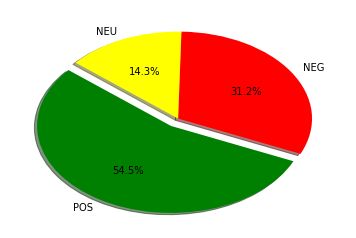

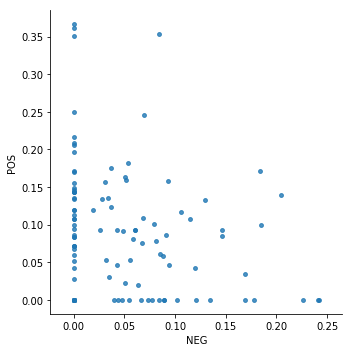

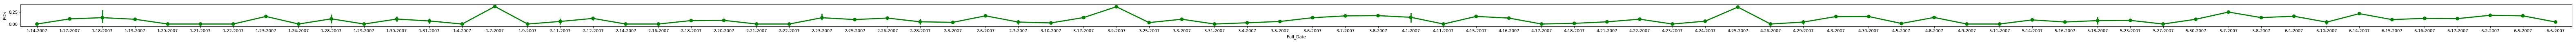

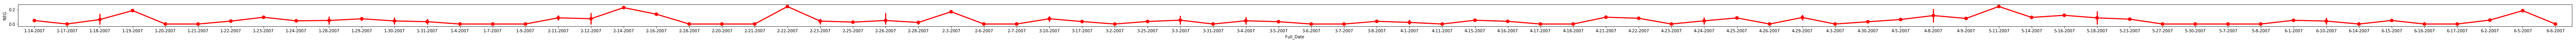

In [235]:
# Create Piechart
labels = ["POS", "NEG", "NEU"]
sizes = [len(subdf1.loc[subdf1["POS"] > subdf1["NEG"]]), len(subdf1.loc[subdf["POS"] < subdf1["NEG"]]), len(subdf1.loc[subdf1["NEU"] == 1])]
colors = ['green', 'red', 'yellow']
explode = (0.1, 0, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

# Create NEG VS POS Scatterplot
x_col='NEG'
y_col='POS'
sns.lmplot(x=x_col,
           y=y_col,
           data=subdf1,
           fit_reg=False,
           scatter_kws={"s": 15})

# Create pointplot
f, ax = plt.subplots(1, 1, figsize=[len(subdf1), 1])
x_col='Full_Date'
y_col='POS'
sns.pointplot(ax=ax,x=x_col,y=y_col,data=subdf1,color='green',scatter_kws={"s": 15})

f, ax = plt.subplots(1, 1, figsize=[len(subdf1), 1])
x_col='Full_Date'
y_col='NEG'
sns.pointplot(ax=ax,x=x_col,y=y_col,data=subdf1,color='red',scatter_kws={"s": 15})

# Print Descriptive Information
print("========== SENTIMENT RESULTS ==========")
print("POI:", name)
print("POS SKEWED ARTICLES:", len(subdf1.loc[subdf1["POS"] > subdf1["NEG"]]))
print("NEG SKEWED ARTICLES:", len(subdf1.loc[subdf1["POS"] < subdf1["NEG"]]))
print("ENTIRELY NEUTRAL:", len(subdf1.loc[subdf1["NEU"] == 1]))
plt.show()

In [232]:
subdf1.loc[subdf1["Full_Date"] == "1-14-2007", "Text"].values[0]
subdf1.loc[subdf1["Full_Date"] == "1-17-2007", "Text"].values[0]
subdf1.loc[subdf1["Full_Date"] == "1-18-2007", "Text"].values[0]
subdf1.loc[subdf1["Full_Date"] == "1-19-2007", "Text"].values[0]
subdf1.loc[subdf1["Full_Date"] == "1-20-2007", "Text"].values[0]

"on friday morning, as the capital was enmeshed in a debate over president bush's decision to send thousands more troops to iraq, no one was more obviously searching for an alternate plan than senator hillary rodham clinton, the new york democrat and likely candidate for president."

"two years after arriving in washington, senator barack obama of illinois made clear on tuesday his intention to enter the democratic presidential race, creating an exploratory committee while preparing to open a full-fledged campaign next month to become the nation's first black president."

'there is always, it seems, a fresh new face breezing into a presidential race, offering himself as the person to change the tone, eliminate the vitriol and transform the old ways of politics.'

'the senate on thursday overwhelmingly passed sweeping changes to ethics and lobbying rules, overcoming bipartisan reluctance to ban many of the favors that lobbyists do for lawmakers and to illuminate the shadowy legislative practice of earmarking money for special projects.'

"of all the new rules passed in congress's recent ethics overhauls, the most sweeping is a barely debated provision in a senate bill passed thursday night that could alter one of the most time-honored campaign fund-raising practices in washington."

In [236]:
subdf1.loc[subdf1["Full_Date"] == "2-14-2007", "Text"].values[0]

'barack obama looked as if he needed a smoke and he needed it bad.'

## John McCain

In [240]:
name = "MCCAIN, JOHN"
subdf2 = pd2007.loc[pd2007["Name"] == name]
if len(subdf2) > 0:
    print(subdf2, len(subdf2))

       index    DOCID Date Month  Year          Name  \
34808      0  1837879    4     4  2007  MCCAIN, JOHN   
56171      0  1855461   18     6  2007  MCCAIN, JOHN   
52392      0  1852160    4     6  2007  MCCAIN, JOHN   
22581      0  1828359   24     2  2007  MCCAIN, JOHN   
30448      0  1834353   20     3  2007  MCCAIN, JOHN   
52877      0  1852694    7     6  2007  MCCAIN, JOHN   
53000      0  1852812    7     6  2007  MCCAIN, JOHN   
40550      0  1842425   23     4  2007  MCCAIN, JOHN   
24358      0  1829912    2     3  2007  MCCAIN, JOHN   
42152      0  1843840   29     4  2007  MCCAIN, JOHN   
9693       0  1820735   22     1  2007  MCCAIN, JOHN   
33677      0  1836888   31     3  2007  MCCAIN, JOHN   
38345      0  1840592   15     4  2007  MCCAIN, JOHN   
15402      0  1823827    4     2  2007  MCCAIN, JOHN   
18929      0  1825763   12     2  2007  MCCAIN, JOHN   
37126      0  1839692   12     4  2007  MCCAIN, JOHN   
29520      0  1833572   17     3  2007  MCCAIN, 

In [241]:
subdf2.drop_duplicates(subset='DOCID').head()

,index,DOCID,Date,Month,Year,Name,Text
34808,0,1837879,4,4,2007,"MCCAIN, JOHN",mitt romney dashed across southern new hampshi...
56171,0,1855461,18,6,2007,"MCCAIN, JOHN",a ranking republican on the senate armed servi...
52392,0,1852160,4,6,2007,"MCCAIN, JOHN","senator john mccain, facing increasing anger f..."
22581,0,1828359,24,2,2007,"MCCAIN, JOHN",we're seeing some awfully complicated position...
30448,0,1834353,20,3,2007,"MCCAIN, JOHN","immigration, an issue that has divided republi..."


In [242]:
subdf2 = subdf2.sort_values(['Year', 'Month', 'Date'], ascending=[True, True, True])
subdf2.head()

,index,DOCID,Date,Month,Year,Name,Text
6152,0,1818955,14,1,2007,"MCCAIN, JOHN","on friday morning, as the capital was enmeshed..."
7698,0,1819713,18,1,2007,"MCCAIN, JOHN",the climate here has definitely changed.
8467,0,1820058,20,1,2007,"MCCAIN, JOHN",senator john mccain of arizona has enlisted st...
9693,0,1820735,22,1,2007,"MCCAIN, JOHN",two years before the next president is inaugur...
10124,0,1820948,23,1,2007,"MCCAIN, JOHN",the public financing system for presidential c...


In [262]:
subdf2['Full_Date'] = subdf2['Month'] + "-" + subdf2['Date'] + "-" + subdf2['Year']
subdf2['NEG'] = subdf2.apply(lambda row: sia.polarity_scores(row.Text).get("neg"), axis=1)
subdf2['NEU'] = subdf2.apply(lambda row: sia.polarity_scores(row.Text).get("neu"), axis=1)
subdf2['POS'] = subdf2.apply(lambda row: sia.polarity_scores(row.Text).get("pos"), axis=1)
subdf2.head()

,index,DOCID,Date,Month,Year,Name,Text,Full_Date,NEG,NEU,POS
6152,0,1818955,14,1,2007,"MCCAIN, JOHN","on friday morning, as the capital was enmeshed...",1-14-2007,0.048,0.952,0.000
7698,0,1819713,18,1,2007,"MCCAIN, JOHN",the climate here has definitely changed.,1-18-2007,0.000,0.649,0.351
8467,0,1820058,20,1,2007,"MCCAIN, JOHN",senator john mccain of arizona has enlisted st...,1-20-2007,0.000,1.000,0.000
9693,0,1820735,22,1,2007,"MCCAIN, JOHN",two years before the next president is inaugur...,1-22-2007,0.040,0.960,0.000
10124,0,1820948,23,1,2007,"MCCAIN, JOHN",the public financing system for presidential c...,1-23-2007,0.093,0.749,0.158


([<matplotlib.patches.Wedge at 0x130a88e10>,
  <matplotlib.text.Text at 0x130ab3390>])

========== SENTIMENT RESULTS ==========
POI: MCCAIN, JOHN
POS SKEWED ARTICLES: 30
NEG SKEWED ARTICLES: 22
ENTIRELY NEUTRAL: 11


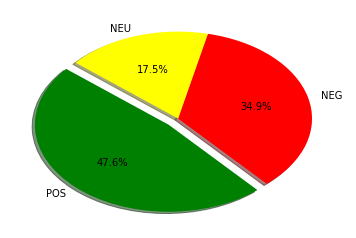

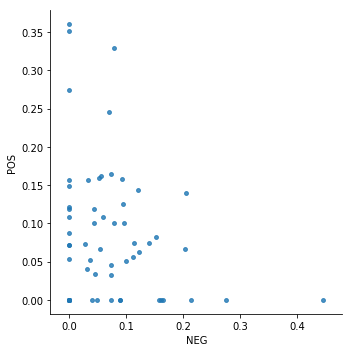

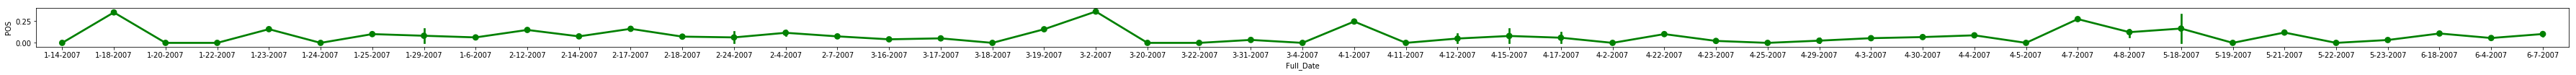

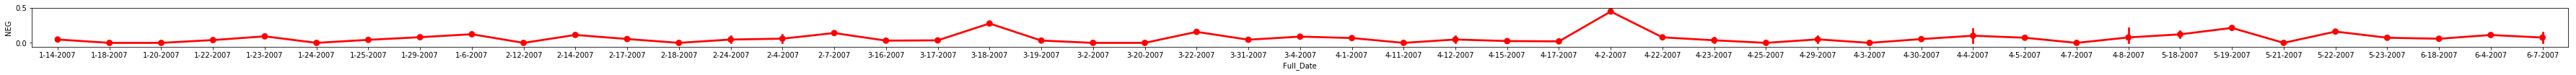

In [253]:
# Create Piechart
labels = ["POS", "NEG", "NEU"]
sizes = [len(subdf2.loc[subdf2["POS"] > subdf2["NEG"]]), len(subdf2.loc[subdf2["POS"] < subdf2["NEG"]]), len(subdf2.loc[subdf2["NEU"] == 1])]
colors = ['green', 'red', 'yellow']
explode = (0.1, 0, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

# Create NEG VS POS Scatterplot
x_col='NEG'
y_col='POS'
sns.lmplot(x=x_col,
           y=y_col,
           data=subdf2,
           fit_reg=False,
           scatter_kws={"s": 15})

# Create pointplots
f, ax = plt.subplots(1, 1, figsize=[len(subdf2), 1])
x_col='Full_Date'
y_col='POS'
sns.pointplot(ax=ax,x=x_col,y=y_col,data=subdf2,color='green',scatter_kws={"s": 15})

f, ax = plt.subplots(1, 1, figsize=[len(subdf2), 1])
x_col='Full_Date'
y_col='NEG'
sns.pointplot(ax=ax,x=x_col,y=y_col,data=subdf2,color='red',scatter_kws={"s": 15})

# Print Descriptive Information
print("========== SENTIMENT RESULTS ==========")
print("POI:", name)
print("POS SKEWED ARTICLES:", len(subdf2.loc[subdf2["POS"] > subdf2["NEG"]]))
print("NEG SKEWED ARTICLES:", len(subdf2.loc[subdf2["POS"] < subdf2["NEG"]]))
print("ENTIRELY NEUTRAL:", len(subdf2.loc[subdf2["NEU"] == 1]))
plt.show()